# Text Classification

**Goal**
- Classify a document $d$
- Into a fixed set of classes $C={c_1,c_2,\ldots,c_n}$

Example:
- Given a set of comments, which are the positive comments and which are negatives.
- Given a set of science articles, which are Physics, Maths, Biology, Chem, etc.
- Given an email, is this a spam or not

Methods:
- Rule-based:
    - Define a "manual" rule by expert.
    - Expensive.
    - Usually, only for a specific domain.
- Supervised-ML:
    - Given documents, set of fixed classes, and a training set of $n$ hand-labeled documents (pair between documents and the corresponding classes)
    - Later, the model would "learn" from the training set.
    - And gives us a classifier

---
## Naive Bayes

- One of the simplest model for classifier.
- Based on Bayes' rule.
- Relies on a very simple representation of a document: Bag of Words

---
### Bag of Words:
Given a text:
> I love this movie! It's sweet,
but with satirical humor. The
dialogue is great and the
adventure scenes are fun… It
manages to be whimsical and
romantic while laughing at the
conventions of the fairy tale
genre. I would recommend it to
just about anyone. I've seen
it several times, and I'm
always happy to see it again
whenever I have a friend who
hasn't seen it yet.

Then, the bag of words model will pair the given words in the document along its frequency:

| Word  | Frequency |
|-------|-----------|
| Great | 3         |
| Love  | 3         |
| happy | 2         |
| ...   | ...       |

However, sometimes we can just use a subset of words:
> x **love** xxxxxxxxxxxxxxxx **sweet**
xxxxxxx **satirical** xxxxxxxxxx
xxxxxxxxxxx **great** xxxxxxx
xxxxxxxxxxxxxxxxxxx **fun** xxxx
xxxxxxxxxxxxx **whimsical** xxxx
**romantic** xxxx **laughing**
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxx **recommend** xxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xx **several** xxxxxxxxxxxxxxxxx
xxxxx **happy** xxxxxxxxx **again**
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxx

- Then, based on the given set of words in a document, the classifier will try to classify the given bag of words into a most probable class.
- For example, a bag of words that contain words (Food, Kitchen, Chef, Fry, Blanch, Tenderloin) should have high probability to be assigned to "Culinary" class instead of "Automotive" class.

---
### Naive Bayes

For a document $d$ and a class $c$:

$$
P(c|d) = \frac{P(d|c)P(c)}{P(d)}
$$

our task is to find the maximum probability (most likely class) given a document:

$$
c_{pred} = \mathrm{argmax}_{c \in C} P(c|d) = \mathrm{argmax}_{c \in C}  \frac{P(d|c)P(c)}{P(d)}
$$

However, given in the same document. The value of $P(d)$ should be the same, hence: 

$$
c_{pred} = \mathrm{argmax}_{c \in C}  P(d|c)P(c)
$$

Given a document is a **sequence** of words. The $P(d|c)$ should be:

$$
P(d|c) = P(w_1,w_2,\ldots,w_n|c)
$$

However, as we are using the **Bag of Words**, the position of the words doesn't matter. Thus:

$$
P(w_1,w_2,\ldots,w_n|c) = P(w_1|c) \cdot P(w_2|c) \cdot \ldots P(w_n|c)
$$

Therefore:

$$
c_{pred} = \mathrm{argmax}_{c_j \in C}  P(c_j) \prod_{i=1}^{n_{words}} P(x_i|c_j)
$$

---
### Estimating the Probability

$$
P(c_j)=\frac{doccount(C=c_j)}{N_{doc}}
$$

$P(c_j)$ is the number of documents with class $c_j$ divided by the total number of documents.

$$
P(w_i|c_j) = \frac{count(w_i,c_j)}{\sum_{w\in V} count(w,c_j)}
$$

$P(w_i|c_j)$ is the fraction of times word $w_i$ appears among all words in documents of topic $c_j$

---
**Problem**

- Similar to n-grams model, there's a possibility that the probability of a given word is 0.
- It can be caused when the context wasn't appear in the training set.
- Here, we use the Laplace (add 1) smoothing for Naive Bayes

$$
P(w_i|c_j) = \frac{count(w_i,c_j)+1}{\left(\sum_{w\in V} count(w,c_j)\right) + |V|}
$$

---
**Learning steps**

- From training corpus, extract the Vocabulary.
- Calculate $P(c_j) terms$:
    - For each $c_j$ in C do:
        - $docs_j$ <- all docs with class = $c_j$
        - $P(c_j) \gets \frac{|docs_j|}{N_{docs}}$
- Calculate $P(w_i|c_j)$:
    - For each word $w_i$ in Vocabulary:
        - $n_k \gets$ # of occurences of $w_k$ in $docs_j$
        - $P(w_i|c_j) \gets \frac{n_k + \alpha}{n + \alpha|Vocab|}$
---
**Unknown Words**

Because, unknown words don't belong to any classes, hence $count(w_u,c) = 0$.

$$
P(w_u|c_j) = \frac{count(w_u,c_j)+1}{\left(\sum_{w\in V} count(w,c_j)\right) + |V+1|}
$$

$$
P(w_u|c_j) = \frac{1}{\left(\sum_{w\in V} count(w,c_j)\right) + |V+1|}
$$


---
## Evaluation

2-by-2 contingency table:

<img src="https://www.researchgate.net/profile/Xiaoxuan-Liu-9/publication/339224791/figure/fig2/AS:859521383673858@1581937275642/Overview-of-confusion-matrix-contingency-table-Differences-in-nomenclature-for-machine.jpg" width= 600px;/>

- In general, accuracy is a common measurement that we commonly use.
- But there's a problem in accuracy.
        - Let's say we want to classify whether a tweet is discussing about your product or not.
        - However, from a 1,000,000 tweets only 100 that are discussing your product and the other 999,900 are not.
        - Now, let's say that your classifier classifies those tweets into class "Not".
        - Then, you'll have an accuracy of $\frac{999900}{1000000} = 0.9999$!
- Then, accuracy is not good when the goal is to discover something rare, or we can tell that the classes are imbalanced.

---
Now, what we can do?

We can use other metrics such as **precision** and **recall**

**Precision**:
- \% of predicted results that are correct
- $Precision = \frac{TP}{TP + FP}$

**Recall**:
- \% of correct items that predicted as correct
- $Precision = \frac{TP}{TP + FN}$

If we go back into the imbalanced classifier problem, the **precision** cannot be determined because it will be $\frac{0}{0}$. Meanwhile, the **recall** is terribly 0.

However, there's a way to incorporate both precision and recall into a single metric. The metric is called **F-measure**. Defined as:

$$
F_\beta = \frac{(\beta^2+1)PR}{\beta^2P + R}
$$

- In the F-measure, $\beta$ parameter weights the importance of recall and precision
- $\beta > 1$ favor recall
- $\beta < 1$ favor precision
- When $\beta=1$ the importance of recall and precision is equally balanced
- This is what we called as the $F_1$-score

$$
F_1 = \frac{2PR}{P+R}
$$

---
What if more than two classes?

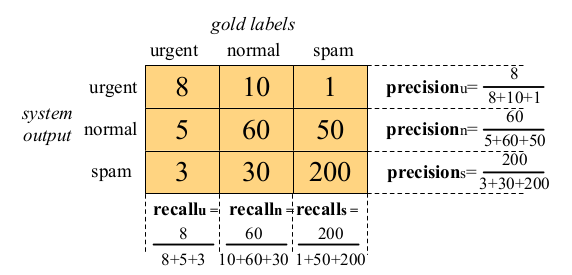

How do we calculate the F-score for this type of problem?
- Macroaveraging: Compute the performance for each class, then average.
- Microaveraging: Collect all decision into a single confusion matrix, then compute the performance.

Microaverage is dominated by more frequent classes. Hence, for imbalanced dataset, macroaveraging is more fair.

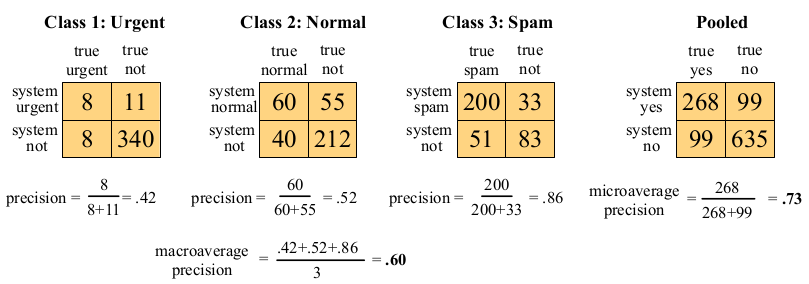